In [ ]:
# 한글설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 7s (1,354 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122400 files and di

In [ ]:
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
plt.rc('font', family = 'NanumBarunGothic')


In [ ]:
data = pd.read_excel('결과물_브랜드평판(2020/01~).xlsx')
data.head()

,Unnamed: 0,2020년01월,2020년02월,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,...,2022년07월,2022년08월,2022년09월,2022년10월,2022년11월,2022년12월,2023년01월,2023년02월,2023년03월,2023년04월
0,가천대,21,17,18,21,16,16,15,17,9,...,17.0,13.0,11.0,10.0,9.0,12.0,11.0,17.0,18.0,14.0
1,한성대,48,36,63,33,35,34,34,35,39,...,71.0,83.0,65.0,64.0,76.0,56.0,58.0,71.0,63.0,71.0
2,삼육대,73,61,62,58,53,55,56,57,56,...,69.0,67.0,77.0,55.0,55.0,78.0,57.0,65.0,62.0,72.0
3,수원대,46,43,44,50,51,52,47,48,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.rename(columns = {'Unnamed: 0':'대학명'}, inplace = True)
data

,대학명,2020년01월,2020년02월,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,...,2022년07월,2022년08월,2022년09월,2022년10월,2022년11월,2022년12월,2023년01월,2023년02월,2023년03월,2023년04월
0,가천대,21,17,18,21,16,16,15,17,9,...,17.0,13.0,11.0,10.0,9.0,12.0,11.0,17.0,18.0,14.0
1,한성대,48,36,63,33,35,34,34,35,39,...,71.0,83.0,65.0,64.0,76.0,56.0,58.0,71.0,63.0,71.0
2,삼육대,73,61,62,58,53,55,56,57,56,...,69.0,67.0,77.0,55.0,55.0,78.0,57.0,65.0,62.0,72.0
3,수원대,46,43,44,50,51,52,47,48,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.set_index('대학명')

In [ ]:
data

,2020년01월,2020년02월,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,2020년10월,...,2022년07월,2022년08월,2022년09월,2022년10월,2022년11월,2022년12월,2023년01월,2023년02월,2023년03월,2023년04월
대학명,,,,,,,,,,,,,,,,,,,,,
가천대,21,17,18,21,16,16,15,17,9,16,...,17.0,13.0,11.0,10.0,9.0,12.0,11.0,17.0,18.0,14.0
한성대,48,36,63,33,35,34,34,35,39,32,...,71.0,83.0,65.0,64.0,76.0,56.0,58.0,71.0,63.0,71.0
삼육대,73,61,62,58,53,55,56,57,56,56,...,69.0,67.0,77.0,55.0,55.0,78.0,57.0,65.0,62.0,72.0
수원대,46,43,44,50,51,52,47,48,44,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


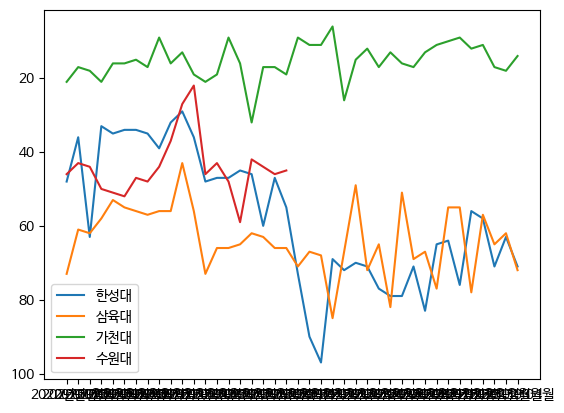

In [ ]:
plt.plot(data.columns, data.loc['한성대'] , label='한성대')
plt.plot(data.columns, data.loc['삼육대'], label='삼육대' )
plt.plot(data.columns, data.loc['가천대'], label='가천대')
plt.plot(data.columns, data.loc['수원대'], label='수원대' )
plt.legend()
plt.gca().invert_yaxis()